# Figure 8: Global Coronal Modeling

- Panel (a): PFSS Solution (with errorbars)
    - Inset (a.i): AR Detection
    - Inset (a.ii): CH Detection
- Panel (b): $B_r R^2$ [nT]
- Panel (c): $B_0$ [G]
- Panel (d): $I_0$
- Panel (e): $f_{ss}$
- Panel (f): Photospheric Footpoints (lon/lat) [deg]

In [1]:
import sys, os
import glob
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import astrospice
import sunpy 
from astropy.coordinates import SkyCoord

import tools.utilities as utils
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs

from tools.utilities import rollto180

from sunpy.map.header_helper import make_heliographic_header

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# REGIONS
loc_hcs = [59.5, 62]
loc_hcs1 = [357, 358.8]
ssw = [9, 19]
fsw = [42, 52]

# COLORS - 'azure'
cc = ['lightpink', 'mediumspringgreen', 'peachpuff', 'powderblue', 'thistle', 'palegoldenrod']
scol, hcol, fcol, rcol = ['lavender', 'azure', 'lavenderblush', 'grey']
# cc = ['black', 'red', 'blue', 'green']
clight = ['lightgrey', '#E6A8C9', '#E6A8C9', '#A8E6BF']

# DIRECTORIES
RES_DIR = os.path.join('/Users/tamarervin/', 'e15_results')
FIG_DIR = os.path.realpath('figures')
EPS_DIR = os.path.realpath('eps_figures')
PlotDir = '/Users/tamarervin/mplstyle/'

# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 3


enc='E15'


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

11-Mar-24 12:35:04: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

## Import Data

In [2]:
# ### READ IN DATA ###
parker, parkerdownt, parkerdownl, pss, orbiter, orbiterdownl, orbiterdownt, oss, wind, winddownt, winddownl, wss = utils.read_data(RES_DIR, pflag=False)

### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
hhcs1 = np.logical_and(lon_footpoints >= loc_hcs1[0], lon_footpoints <=loc_hcs1[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

11-Mar-24 12:35:06: /Users/tamarervin/publications/e15/tools/utilities.py:172: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()

11-Mar-24 12:35:06: /Users/tamarervin/publications/e15/tools/utilities.py:172: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()

11-Mar-24 12:35:08: /Users/tamarervin/publications/e15/tools/utilities.py:181: FutureWarning: 'loffset' in .resample() and in Grouper() is d

## Potential Field Source Surface (PFSS) Model

### Create PFSS

In [3]:
# download/read in magnetogram
rss=2.5
local_path = os.path.join('/Volumes/TAMARUSB/pub_data', 'e15_adapt')
print(local_path)
files = sorted(glob.glob(os.path.join(local_path, '*.fts.gz')))
filepath = files[1]

# create magnetogram
adapt_magnetogram = pfss_funcs.adapt2pfsspy(filepath, return_magnetogram=True)
gong_map = sunpy.map.Map(adapt_magnetogram.data/1e5, adapt_magnetogram.meta)

# run PFSS model
pfss_model = pfss_funcs.adapt2pfsspy(filepath,rss)

# trace PFSS lines
flines = pfss_funcs.pfss2flines(pfss_model)

11-Mar-24 12:35:09: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:35:09: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate

11-Mar-24 12:35:09: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:35:09: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is m

/Volumes/TAMARUSB/pub_data/e15_adapt
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:35:12: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(



In [4]:
# get PSP at source surface
pdatetimes = parker.Time

# get inertial PSP coordinates 
psp_coords_inertial = astrospice.generate_coords('SOLAR PROBE PLUS', pdatetimes)

# Transform to Heliographic Carrington, i.e. the frame that co-rotates with the Sun.
psp_coords_carr = psp_coords_inertial.transform_to(
sunpy.coordinates.HeliographicCarrington(observer="self"))

# get psp longitude and latitude at source surface
psp_at_source_surface = psp_funcs.coord_projection(psp_coords_carr, rss, pdatetimes)

In [5]:
# get Br at the source surface from the pfss model
pfss_br = pfss_model.source_surface_br

# get HCS
hcs = pfss_model.source_surface_pils[0]

# get trajectory 
polarity = np.sign(parker.BrR2)
pos = np.where(polarity == 1)
neg = np.where(polarity == -1)

# get field lines
flines_psp = pfss_funcs.pfss2flines(pfss_model, skycoord_in=psp_at_source_surface)

# high res field lines
flines_highres = pfss_funcs.pfss2flines(pfss_model,nth=181,nph=361)

# get field line topology defined by polarity
topologies = flines_highres.polarities.reshape([181,361])

11-Mar-24 12:37:13: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(



### Errors in Footpoint Estimations

In [6]:
RSS = [2.0, 2.25, 2.50, 2.75, 3.0]
pfss_lon, pfss_lat = [], []
ss_df = pd.DataFrame()
for i, rss in enumerate(RSS):
    # run PFSS model
    pfss_model = pfss_funcs.adapt2pfsspy(filepath,rss)

    # trace PFSS lines
    flines = pfss_funcs.pfss2flines(pfss_model)

    # get Br at the source surface from the pfss model
    pfss_br = pfss_model.source_surface_br

    # get HCS
    hcs = pfss_model.source_surface_pils[0]

    # get trajectory 
    polarity = np.sign(parker.BrR2)
    pos = np.where(polarity == 1)
    neg = np.where(polarity == -1)

    # get field lines
    psp_ss = psp_funcs.ballistically_project(psp_coords_carr,vr_arr=np.array(parker.vr)*u.km/u.s, r_inner=rss*u.Rsun)
    fpsp = pfss_funcs.pfss2flines(pfss_model, skycoord_in=psp_ss)

    # add column to dataframe
    # ss_df['lon'+str(rss)] = fpsp.open_field_lines.solar_feet.lon.value
    # ss_df['lat'+str(rss)] = fpsp.open_field_lines.solar_feet.lat.value
    pfss_lon.append(fpsp.open_field_lines.solar_feet.lon.value)
    pfss_lat.append(fpsp.open_field_lines.solar_feet.lat.value)
    # pfss[str(rss*100)+'flat'] = flines_psp.open_field_lines.solar_feet.lat.value

    # print 
    print('Finished with source surface height:', rss)

11-Mar-24 12:37:14: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:37:14: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:37:16: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(

11-Mar-24 12:38:12: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:38:12: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate



Finished with source surface height: 2.0
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:38:13: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(

11-Mar-24 12:39:08: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:39:08: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate



Finished with source surface height: 2.25
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:39:10: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(

11-Mar-24 12:40:07: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:40:07: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate



Finished with source surface height: 2.5
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:40:08: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(

11-Mar-24 12:41:06: Missing metadata for solar radius: assuming the standard radius of the photosphere.
11-Mar-24 12:41:06: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/sunpy/map/mapbase.py:627: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate



Finished with source surface height: 2.75
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


11-Mar-24 12:41:07: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to 1000) and try again.
  warnings.warn(



Finished with source surface height: 3.0


In [7]:
ss_df = pd.DataFrame(data={'lon': pfss_lon, 'lat': pfss_lat})
ss_df.to_csv('ssdf.csv')

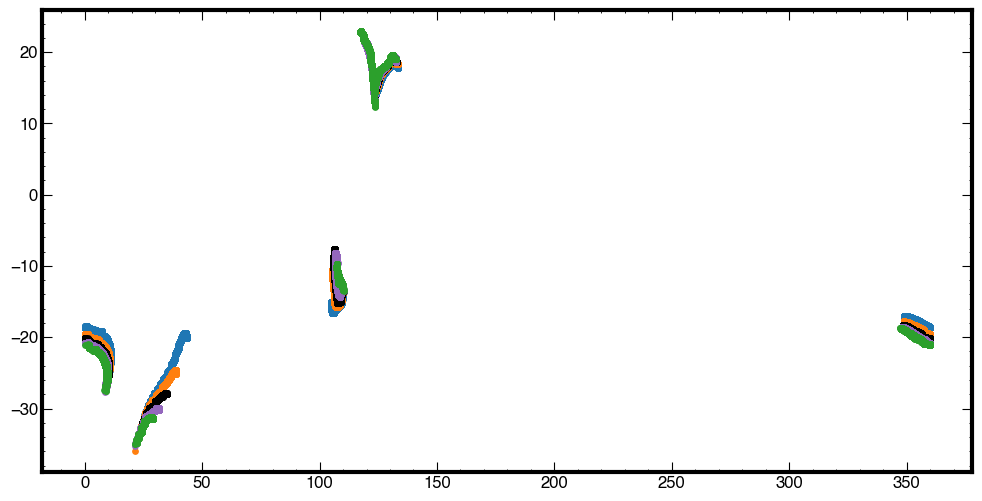

In [8]:
### PLOT DATA ###
fig, ax = plt.subplots(1, figsize=[12, 6])
pfss_col = ['tab:blue', 'tab:orange', 'black', 'tab:purple', 'tab:green']
for i, ll in enumerate(pfss_lon):
    ax.scatter(pfss_lon[i], pfss_lat[i], c=pfss_col[i], s=15) 

In [9]:
### INDUCE NOISE IN THE PROPAGATION RESULT
field_lines_ss, ss_new_coords = [], []
for i in np.arange(5):
    lon_noise = np.random.uniform(-5, 5, len(psp_at_source_surface.lat.value))
    lat_noise = np.random.uniform(-5, 5, len(psp_at_source_surface.lat.value))

    # create new coordinates
    new_coords = SkyCoord(lon=psp_at_source_surface.lon+lon_noise*u.deg, lat=psp_at_source_surface.lat+lat_noise*u.deg, 
                           radius=psp_at_source_surface.radius, representation_type="spherical",
                          frame = psp_at_source_surface.frame)
    ss_new_coords.append(new_coords)
    field_lines_ss.append(pfss_funcs.pfss2flines(pfss_model, skycoord_in=new_coords))



In [10]:
### INDUCE NOISE IN VELOCITY 
source_surface, field_lines, velocity = [], [], []
for i in np.arange(5):
    noise = np.random.uniform(-20, 20, len(parker.vr))
    vel = parker.vr + noise
    source_surface.append(psp_funcs.ballistically_project(psp_coords_carr,vr_arr=np.array(vel)*u.km/u.s, r_inner=2.5*u.Rsun))
    field_lines.append(pfss_funcs.pfss2flines(pfss_model, skycoord_in=source_surface[i]))
    velocity.append(vel)

: 

: 

# Appendix A: Figure 3

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import sunpy.visualization.colormaps as cm

from sunpy.map.header_helper import make_heliographic_header
from astropy.coordinates import SkyCoord

# data parameters
cadence = a.Sample(12*u.hour)  # querying cadence
start_date = '2023-03-16T00:00:00'  # start date of query
end_date = '2023-03-20T00:00:00'  # end date of query

# query data
aia_result = Fido.search(a.Time(start_date, end_date),
                     a.Instrument.aia, a.Wavelength(193 * u.angstrom), cadence)
file_download = Fido.fetch(aia_result)
map_seq = sunpy.map.Map(sorted(file_download))

# read result dataframe
aia_result

In [ ]:
### SUBMAP CREATION
aia_map = map_seq[-1]
shape = (720, 1440)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')
outmap = aia_map.reproject_to(carr_header)
bottom_left = SkyCoord(0*u.degree, -90*u.degree, frame=outmap.coordinate_frame)
aia_submap = outmap.submap(bottom_left, width=45*u.degree, height=180*u.degree)

aia_submap.plot()

In [ ]:
### FIGURE SETUP ###
nf=int(len(flines_psp)/400)-2
fig, axs = plt.subplots(1, 3, figsize=[16, 6], sharex='all', sharey='all', gridspec_kw={'wspace':0.10})
pfss_col = ['tab:blue', 'tab:orange', 'grey', 'tab:purple', 'tab:green']
panel_labels = ['(a)', '(b)', '(c)']

##### ---------- PANEL (A): VELOCITY NOISE FOOTPOINTS  ---------- ######
ax = axs[0]
ax.scatter(flines_psp.open_field_lines.solar_feet.lon.value, flines_psp.open_field_lines.solar_feet.lat.value, s=4, c='grey', marker='D', edgecolor='grey', lw=0.5) 
for i, ll in enumerate(field_lines):
    ax.scatter(ll.open_field_lines.solar_feet.lon.value, ll.open_field_lines.solar_feet.lat.value, c='lemonchiffon', s=4, zorder=-2) 
ax.set_title(r'$\rm Velocity \; Noise \; (\pm 20 \; km \; s^{-1})$', fontsize=18)
ax.set_ylabel('Heliographic Latitude [deg]', fontsize=18)
    
### AXES LEGEND
sa = mpatches.Patch(facecolor=scol, edgecolor='k', linewidth=0.5, label= r'$\rm Sub-Alfv\'enic$')
sf = mpatches.Patch(facecolor=fcol, edgecolor='k', linewidth=0.5, label= r'$\rm FSW$')
leg0 = ax.legend(handles=[sa, sf], loc='upper left', fontsize=16, edgecolor='k')
ax.add_artist(leg0)

##### ---------- PANEL (B): SOURCE SURFACE NOISE FOOTPOINT COMPARISON  ---------- ######
ax = axs[1]
ax.scatter(flines_psp.open_field_lines.solar_feet.lon.value, flines_psp.open_field_lines.solar_feet.lat.value, c='grey', s=4, marker='D', edgecolor='grey', lw=0.5) 
for i, ll in enumerate(field_lines_ss):
    ax.scatter(ll.open_field_lines.solar_feet.lon.value, ll.open_field_lines.solar_feet.lat.value, c='lemonchiffon', s=4, zorder=-2)
ax.set_title(r'$\rm Ballistic \; Propagation \; Noise \; (\pm 5^{\circ})$', fontsize=18)
ax.set_xlabel('Heliographic Longitude [deg]', fontsize=18)

##### ---------- PANEL (C): SOURCE SURFACE HEIGHT VARIANCE  ---------- ######
ax = axs[2]
for i, ll in enumerate(ss_df.columns):
    ax.scatter(pfss_lon[i], pfss_lat[i], c=pfss_col[i], s=15) 
ax.set_title(r'$\rm R_{SS} \; Height \; Variance$', fontsize=18)


### LEGEND ###
p15 = mpatches.Patch(facecolor=pfss_col[0], label=r'$\rm 2.0 R_{\odot}$', edgecolor='k', linewidth=0.5)
p175 = mpatches.Patch(facecolor=pfss_col[1], edgecolor='k', linewidth=0.5, label=r'$\rm 2.25 R_{\odot}$')
p2 = mpatches.Patch(facecolor=pfss_col[2], edgecolor='k', linewidth=0.5, label=r'$\rm 2.5 R_{\odot}$')
p225 = mpatches.Patch(facecolor=pfss_col[3], edgecolor='k', linewidth=0.5, label=r'$\rm 2.75 R_{\odot}$')
p25 = mpatches.Patch(facecolor=pfss_col[4], edgecolor='k', linewidth=0.5, label=r'$\rm 3.0 R_{\odot}$')
# mp = mpatches.Patch(color='tab:red',  label=r'$\rm MHD \; Results$')
leg0 = ax.legend(handles=[p15, p175, p2, p225, p25], loc='upper left', fontsize=16, ncol=2)
ax.add_artist(leg0)

### add footpoints
lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.source_surface_feet.lat[::nf]
use = np.logical_and(lon_footpoints >=0, lon_footpoints <=ssw[0])
use1 = np.logical_and(lon_footpoints >=ssw[1], lon_footpoints <=fsw[0]) 
use2 = np.logical_and(lon_footpoints >=fsw[1], lon_footpoints <=180)
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]

for i, ax in enumerate(axs):
    # axes limits
    ax.set(xlim=(0, 46), xticks=np.arange(0, 46, step=15))
    ax.set(ylim=(-90, 90), yticks=np.arange(-90, 91, step=45))
    # tick params
    ax.tick_params(axis='both', which='major', labelsize=16) 
    # panel labels
    ax.text(0.90, 0.95, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

    # add FSW and SA wind footpoints
    ax.scatter(lon_footpoints[slow], lat_footpoints[slow], s=100, facecolor='none', marker='D', zorder=3, edgecolor=scol, linewidth=1)
    ax.scatter(lon_footpoints[fast], lat_footpoints[fast], s=100, facecolor='none', marker='s', zorder=3, edgecolor=fcol, linewidth=1)
    
    # add AIA image
    lons = np.linspace(0, 45, 181)
    lats = np.linspace(-90, 90, 721)
    lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(aia_submap.data.flatten(),10), 
                            vmax=np.nanpercentile(aia_submap.data.flatten(),99.9))
    ax.pcolormesh(lons, lats, aia_submap.data, cmap='sdoaia193', norm=lognorm, zorder=-10)

# save figure
fig.savefig('figures/fig11.png', bbox_inches='tight') #PNG
# fig.savefig('eps_figures/fig11.eps', bbox_inches='tight') #EPS
fig.savefig('eps_figures/fig11.pdf', bbox_inches='tight') #EPS


# Calculate Footpoint Brightness and Field Strength

In [ ]:
import h5py
import sunpy.map

local_path = os.path.join('/Volumes/TAMARUSB/pub_data', 'e15_euv')
filepath = glob.glob(os.path.join(local_path, '*.h5'))[1]

with h5py.File(filepath, 'r') as h5_file:
    data = h5_file['Data'][:]
    chd = h5_file['chd'][:]
    data_unit = "float32"
  
    coordinate_info = {'cunit1': 'arcsec', 'cunit2': 'arcsec', 'ctype1': 'CRLN-CEA', 'ctype2': 'CRLT-CEA'}

    sunpy_map = sunpy.map.Map(data, coordinate_info)


In [ ]:
#### FOOTPOINTS
lats = np.array(flines_psp.open_field_lines.solar_feet.lat)
lons = np.array(flines_psp.open_field_lines.solar_feet.lon.value)


##### ---------- FOOTPOINT BRIGHTNESS  ---------- ######
sunpy_map = sunpy.map.Map(os.path.join('/Volumes/TAMARUSB/pub_data', 'e15_euv', '2023-03-17_0193.fits'))

# Convert latitude and longitude arrays to SkyCoord
coords = SkyCoord(lon=lons*u.deg, lat=lats*u.deg, frame=sunpy_map.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(sunpy_map.wcs)

# Extract data values from SunPy map at pixel coordinates
I00 = sunpy_map.data[(pixel_coords_y).astype(int), (pixel_coords_x).astype(int)]

##### ---------- FOOTPOINT FIELD STRENGH  ---------- ######
smap = gong_map

# Convert latitude and longitude arrays to SkyCoord
coords = SkyCoord(lon=lons*u.deg, lat=lats*u.deg, frame=smap.coordinate_frame)

# footpoint magnetic field
pixel_coords = coords.to_pixel(smap.wcs)
B0 = smap.data[pixel_coords[1].astype(int), pixel_coords[0].astype(int)]

##### ---------- SOURCE SURFACE FIELD STRENGTH  ---------- ######
#### FOOTPOINTS
lats = np.array(flines_psp.open_field_lines.source_surface_feet.lat)
lons = np.array(flines_psp.open_field_lines.source_surface_feet.lon.value)

### FIELD STRENGTH
coords = SkyCoord(lon=lons*u.deg, lat=lats*u.deg, frame=smap.coordinate_frame)
pixel_coords = coords.to_pixel(smap.wcs)
Bss = smap.data[pixel_coords[1].astype(int), pixel_coords[0].astype(int)]

##### ---------- OPEN FLUX EXPANSION  ---------- ######
use = np.where(flines_psp.connectivities == 1)[0]
f = (u.Rsun/(psp_coords_carr[use].radius).to(u.R_sun)) ** 2 * (B0/parker.Br[use])
fss = (u.Rsun/(flines_psp.open_field_lines.source_surface_feet.radius).to(u.R_sun)) ** 2 * (B0/Bss)


##  MHD Footpoints

In [ ]:
# tracerdf = pd.read_csv('/Users/tamarervin/publications/e15_conjunction/mhd/footpoint-locations.dat', sep='\s+') 
# mlat = 90 - tracerdf.t*u.rad.to(u.deg) # convert co-latitude to latitude
# mlon = tracerdf.p*u.rad.to(u.deg)

In [ ]:
# nf=10
# lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
# lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
# plt.scatter(lon_footpoints, lat_footpoints)
# plt.scatter(mlon, mlat)
# # print(len(lat_footpoints))
# # len(mlon)


## Create PFSS Data Frame

In [ ]:
df = pd.DataFrame()
use = np.where(flines_psp.connectivities == 1)[0]
df['sslon'] = flines_psp.open_field_lines.source_surface_feet.lon.value
df['sslat'] = flines_psp.open_field_lines.source_surface_feet.lon.value
df['flon'] = flines_psp.open_field_lines.solar_feet.lon.value
df['flat'] = flines_psp.open_field_lines.solar_feet.lat.value
df['B0'] = B0*1e5
df['fss'] = fss
df['I0'] = I00 
use = np.logical_and(np.abs(df.fss)<=80, df.I0<=700)
df = df[use].copy()
dflon = utils.lon_bin(df, vv='sslon')

df.to_csv(os.path.join(RES_DIR, 'pfss.csv'))

# FSW Region Connection

- SDO/AIA Images
- Footpoint connection

In [ ]:
### FIND TIME WHEN FSW PLASMA LEFT SURFACE
use = np.logical_and(parker.sslon >= fsw[0], parker.sslon <=fsw[1])
times = parker.Time[use]
vels = parker.vr[use] * u.km/u.s
rads = (np.array(parker.rAU[use]) * u.au).to(u.km)

deltaT = np.array(rads / vels)
Tsun = [timestamp - datetime.timedelta(seconds=seconds) for timestamp, seconds in zip(times, deltaT)]

fsw_times = pd.DataFrame(data={'Tparker': times, 'Tsun':Tsun, 'vr': vels})
fsw_times

In [ ]:
### DOWNLOAD AIA IMAGES

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import sunpy.visualization.colormaps as cm

from sunpy.map.header_helper import make_heliographic_header
from astropy.coordinates import SkyCoord

# data parameters
cadence = a.Sample(1*u.hour)  # querying cadence
start_date = '2023-03-17T08:00:00'  # start date of query
end_date = '2023-03-17T13:00:00'  # end date of query

# query data
aia_result = Fido.search(a.Time(start_date, end_date),
                     a.Instrument.aia, a.Wavelength(193 * u.angstrom), cadence)
file_download = Fido.fetch(aia_result)
map_seq = sunpy.map.Map(sorted(file_download))

# read result dataframe
aia_result

In [ ]:
### FAST WIND!!!!
### SUBMAP CREATION
aia_map = map_seq[3]
shape = (720, 1440)
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')
outmap = aia_map.reproject_to(carr_header)
bottom_left = SkyCoord(20*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
fsw_submap = outmap.submap(bottom_left, width=30*u.degree, height=40*u.degree)
fig = plt.figure()
ax = fig.add_subplot(projection=fsw_submap)

## FIGURE
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),20), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
fsw_submap.plot(axes=ax, norm=lognorm)

### PLOT FOOTPOINTS
fast = np.logical_and(df.sslon >= fsw[0], df.sslon <=fsw[1])
coords = SkyCoord(lon=np.array(df.flon[fast])*u.deg, lat=np.array(df.flat[fast])*u.deg, frame=fsw_submap.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(fsw_submap.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=fcol, linewidth=2)
ax.set_title('Fast Wind Region')



In [ ]:
fig, ax = plt.subplots(1)
### 
lons = np.linspace(20, 50, 121)
lats = np.linspace(-45, 0, 161)
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),20), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
ax.pcolormesh(lons, lats, fsw_submap.data, cmap='sdoaia193', norm=lognorm, zorder=-1)

### PLOT FOOTPOINTS
fast = np.logical_and(df.sslon >= fsw[0], df.sslon <=fsw[1])
coords = SkyCoord(lon=np.array(df.flon[fast])*u.deg, lat=np.array(df.flat[fast])*u.deg, frame=fsw_submap.coordinate_frame)
# pixel_coords_x, pixel_coords_y = coords.to_pixel(fsw_submap.wcs)
ax.scatter(coords.lon, coords.lat, marker='s', zorder=3, facecolor='none', edgecolor=fcol, linewidth=2)
ax.set_title('Fast Wind Region')


# SA Region Connection

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import sunpy.visualization.colormaps as cm
# data parameters
cadence = a.Sample(12*u.hour)  # querying cadence
start_date = '2023-03-17T12:00:00'  # start date of query
end_date = '2023-03-21T12:00:00'  # end date of query

hmi_result = Fido.search(a.Time(start_date, end_date),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field, cadence)


file_download = Fido.fetch(hmi_result)
map_seq = sunpy.map.Map(sorted(file_download))


In [ ]:
### READ IN HMI MAP

# for m in map_seq:
hmi_map = gong_map

### CREATE CARRINGTON MAP
shape = (720, 1440)
carr_header = make_heliographic_header(hmi_map.date, hmi_map.observer_coordinate, shape, frame='carrington')
outmap = hmi_map.reproject_to(carr_header)

bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
hmisubmap = outmap.submap(bottom_left, width=45*u.degree, height=45*u.degree)
# Now 'hmimap_carrington' contains the data in Heliographic Carrington coordinates
fig = plt.figure()
ax = fig.add_subplot(projection=hmisubmap)
# hmisubmap.plot(axes=ax, cmap='hmimag')
plt.imshow(hmisubmap.data, cmap='hmimag')
nf=30
lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])

lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
coords = SkyCoord(np.array(lon_footpoints[slow][::3])*u.deg, np.array(lat_footpoints[slow][::3])*u.deg, frame=outmap.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(hmisubmap.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=scol, linewidth=.5)
ax
plt.show()

In [ ]:

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import sunpy.visualization.colormaps as cm

from sunpy.map.header_helper import make_heliographic_header
from astropy.coordinates import SkyCoord

import hvpy
import matplotlib.pyplot as plt
from hvpy.datasource import DataSource

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
from sunpy.coordinates import Helioprojective
from sunpy.map import Map
from sunpy.util.config import get_and_create_download_dir

### DOWNLOAD AIA IMAGES
# data parameters
cadence = a.Sample(10*u.minute)  # querying cadence
start_date = '2023-03-15T06:40:00'  # start date of query
end_date = '2023-03-15T07:10:00'  # end date of query

# query data
aia_result = Fido.search(a.Time(start_date, end_date),
                     a.Instrument.aia, a.Wavelength(193 * u.angstrom), cadence)
file_download = Fido.fetch(aia_result)
map_seq = sunpy.map.Map(sorted(file_download))

# read result dataframe
aia_result


In [ ]:
aia_map = map_seq[1]

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)

## FIGURE
aia_map.plot(axes=ax)
coords = SkyCoord(Tx=-856*u.arcsec, Ty=-261*u.arcsec, frame=aia_map.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(aia_map.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor='blue', linewidth=2, label='CME Eruption')

slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
coords = SkyCoord(np.array(lon_footpoints[slow][::3])*u.deg, np.array(lat_footpoints[slow][::3])*u.deg, frame=outmap.coordinate_frame)
pixel_coords_x, pixel_coords_y = coords.to_pixel(aia_map.wcs)
ax.scatter(pixel_coords_x, pixel_coords_y, marker='D', zorder=3, facecolor='none', edgecolor=scol, linewidth=2, label='SA Stream')
ax.legend()

plt.savefig(os.path.join(FIG_DIR, 'cme_eruption.png'), bbox_inches='tight')

# PAPER FIGURE

In [ ]:
proll = rollto180(np.array(parker.sslon)*u.deg)
plroll = rollto180(np.array(parkerdownl.sslon)*u.deg)
dfroll = rollto180(np.array(df.sslon)*u.deg)
dflonroll = rollto180(np.array(dflon.sslon)*u.deg)

In [ ]:
# create figure
fig = plt.figure(figsize=(16, 18))
grid = plt.GridSpec(7, 1, height_ratios=[2, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], hspace=0)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# LABELS
ylabels = [r'$\rm M_A$', 
            r'$\rm B_R R^2 \; [nT]$', 
            r'$\rm |B_0| \; [G]$', 
            r'$\rm I_0$', 
            r'$\rm f_{ss}$', 
            r'$\rm Photospheric$' + '\n' + r'$\rm Longitude \; [deg]$']

# dimensions
dim=[-15, 135, -90, 90]
tm=4
ss, lw = 20, 3
dd = 30 #int((dim[1]-dim[0])/tm)

# add axes
ax0 = fig.add_subplot(grid[0, :])
ax1 = fig.add_subplot(grid[1, :])
ax2l = fig.add_subplot(grid[2, :])
ax3 = fig.add_subplot(grid[3, :])
ax4l = fig.add_subplot(grid[4, :])
ax5 = fig.add_subplot(grid[5, :])
ax6 = fig.add_subplot(grid[6, :])

# create twinx axes
ax2l.set_yticklabels([])
ax4l.set_yticklabels([])
ax2 = ax2l.twinx()
ax4 = ax4l.twinx()

##### ---------- PANEL ONE: PFSS FIGURE  ---------- ######
ax=ax0
nf=int(len(flines_psp)/400)-2

### SET UP COLOR SCHEME
lons = np.linspace(-180, 180, 721)
lats = np.linspace(-90, 90, 361)
color_dict = {-1:"tab:blue", 0:"black", 1:"tab:red"}
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(sunpy_map.data.flatten(),10), 
                            vmax=np.nanpercentile(sunpy_map.data.flatten(),99.9))

### EUV MAP
ax.pcolormesh(lons[360:], lats, sunpy_map.data[:, :360], cmap='euvi195', zorder=-1, norm=lognorm)
ax.pcolormesh(lons[:361], lats, sunpy_map.data[:, 360:], cmap='euvi195', zorder=-1, norm=lognorm)
ax.set(xlim=(-15, 135), xticks=np.arange(-15, 136, step=30), xticklabels=[])
ax.set(ylim=(-90, 90), yticks=np.arange(-90, 91, step=180/4), yticklabels=[-90, -45, 0, 45, 90])
ax.set_yticklabels([-90, -45, 0, 45, 90], fontsize=18)
ax.set_ylabel(r'$\rm Carrington \; Latitude \; [deg]$', fontsize=20)

### HCS
use = np.logical_and(rollto180(hcs.lon).value>=-45, hcs.lon.value <=180)
ax.plot(rollto180(hcs.lon[use]), rollto180(hcs.lat[use]), color='azure', label='HCS', zorder=0, linewidth=5)

### PFSS FIELD LINES
use = np.logical_and(rollto180(psp_at_source_surface.lon).value>=-45, psp_at_source_surface.lon.value <=180)
for f in flines_psp[use][::nf] :
    fcoords = f.coords
    fcoords.representation_type="spherical"
    ax.plot(rollto180(fcoords.lon),
            fcoords.lat,
            color = color_dict.get(f.polarity), 
            linewidth=1, zorder=1
        )
    
### PFSS FOOTPOINTS
lon_footpoints = rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[::nf]
lat_footpoints = flines_psp.open_field_lines.source_surface_feet.lat[::nf]
use = np.logical_and(lon_footpoints >=0, lon_footpoints <=ssw[0])
use1 = np.logical_and(lon_footpoints >=ssw[1], lon_footpoints <=fsw[0]) 
use2 = np.logical_and(lon_footpoints >=fsw[1], lon_footpoints <=180)
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

lon_footpoints = rollto180(flines_psp.open_field_lines.solar_feet.lon).value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
ax.scatter(lon_footpoints[use][::2], lat_footpoints[use][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[use1][::2], lat_footpoints[use1][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[use2][::2], lat_footpoints[use2][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], s=100, color=scol, marker='D', zorder=3, edgecolor='k', linewidth=.5)
ax.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], s=100, color=fcol, marker='s', zorder=3, edgecolor='k', linewidth=.5)

### TRAJECTORY
polarity = np.sign(parker.BrR2)
pos = np.where(polarity == 1)
neg = np.where(polarity == -1)
lon_traj = rollto180(psp_at_source_surface.lon)
ax.scatter(lon_traj[neg], psp_at_source_surface.lat[neg], color='navy', label='Negative Polarity', zorder=2, s=3)
ax.scatter(lon_traj[pos], psp_at_source_surface.lat[pos], color='maroon',label='Positive Polarity', zorder=3, s=3)

### AXES LEGEND
h = mpatches.Patch(facecolor='azure',  edgecolor='k', linewidth=0.5, label= r'$\rm HCS$')
p = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Outward \; B_R$')
n = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Inward \; B_R$')
sa = mpatches.Patch(facecolor=scol, edgecolor='k', linewidth=0.5, label= r'$\rm Sub-Alfv\'enic \; Footpoint$')
sf = mpatches.Patch(facecolor=fcol, edgecolor='k', linewidth=0.5, label= r'$\rm FSW \; Footpoint$')
leg0 = ax.legend(handles=[h, p, n, sa, sf], loc='upper left', fontsize=18, edgecolor='k')
ax.add_artist(leg0)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(a)', transform=ax.transAxes, fontsize=20, c='white', fontweight='bold', va='top', ha='left')

##### ---------- INSET AXES: FSW AIA CONNECTION ---------- ######
inset_rect = [0.75, 0.55, 0.20, 0.40]
axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
ax.indicate_inset_zoom(axins)

### FIGURE
lons = np.linspace(20, 50, 121)
lats = np.linspace(-45, 0, 161)
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),10), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
axins.pcolormesh(lons, lats, fsw_submap.data, cmap='sdoaia193', norm=lognorm, zorder=-1)

### PLOT FOOTPOINTS
axins.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], marker='s', zorder=3, 
              facecolor='none', edgecolor=fcol, linewidth=2)

### SPINE COLORS
axins.spines['top'].set_color('white')
axins.spines['right'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.spines['left'].set_color('white')

### RECTANGLE ON FIGURE
rect = plt.Rectangle((20, -45), 30, 45, fc="none", ec="white", linewidth=3)
ax.add_patch(rect)

### CONNECT INSET
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(50, -45), xyB=(20, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)
con = ConnectionPatch(xyA=(50, 0), xyB=(20, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)

### TICK MARKS
axins.set(xlim=(20, 50), xticks=np.arange(20, 51, step=10), xticklabels=[20, 30, 40, 50])
axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.text(0.10, 0.93, '(a.i)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


##### ---------- INSET AXES: MAGNETIC FIELD MAP ---------- ######
inset_rect = [0.75, 0.05, 0.20, 0.40]
axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
ax.indicate_inset_zoom(axins)

### CREATE CARRINGTON MAP
shape = (720, 1440)
carr_header = make_heliographic_header(gong_map.date, gong_map.observer_coordinate, shape, frame='carrington')
outmap = gong_map.reproject_to(carr_header)

bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
gong_submap = outmap.submap(bottom_left, width=15*u.degree, height=45*u.degree)

### SET UP COLOR SCHEME
lons = np.linspace(0, 15, 61)
lats = np.linspace(-45, 0, 181)
axins.pcolormesh(lons, lats, gong_submap.data, cmap='hmimag', zorder=-1)

### PLOT FOOTPOINTS
lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
axins.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], marker='D', zorder=3, 
              facecolor='none', edgecolor='k', linewidth=2)

### SPINE COLORS
axins.spines['top'].set_color('white')
axins.spines['right'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.spines['left'].set_color('white')

### RECTANGLE ON FIGURE
rect = plt.Rectangle((0, -45), 15, 45, fc="none", ec="white", linewidth=3)
ax.add_patch(rect)

### CONNECT INSET
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(15, -45), xyB=(0, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)
con = ConnectionPatch(xyA=(15, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)

### TICK MARKS
axins.set(xlim=(0, 15), xticks=np.arange(0, 16, step=5), xticklabels=[0, 5, 10, 15])
axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.text(0.10, 0.93, '(a.ii)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

##### ---------- PANEL ONE: MACH NUMBER  ---------- ######
ax = ax1

### MACH NUMBER
# ax.scatter(proll, parker.MA, c=parker.MA, cmap='coolwarm', s=8)
ax.step(plroll, parkerdownl.MA, color='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-0.5, 4.5), yticks=np.arange(0, 4.1, step=1))
ax.axhline(1, linestyle='dashed', color='k', zorder=-1)
ax.set_xticklabels([])

##### ---------- PANEL TWO: MAGNETIC FIELD & RADIUS  ---------- ######
ax = ax2

### MAGNETIC FIELD
ax.scatter(proll, parker.BrR2, c=parker.BrR2, cmap='coolwarm', s=8)
ax.step(plroll, parkerdownl.BrR2, color='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-5, 5), yticks=np.arange(-4, 4.1, step=2))
ax.axhline(0, linestyle='dashed', color='k', zorder=-1)
ax.set_xticklabels([])

##### ---------- PANEL THREE: FOOTPOINT FIELD STRENGTH   ---------- ######
ax = ax3
ss=15
ax.scatter(dfroll, np.abs(df.B0), c=df.B0, cmap='Wistia', s=ss)
ax.step(dflonroll, np.abs(dflon.B0), c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-15, 135), yticks=np.arange(0, 121, step=30))
ax.set_xticklabels([])

##### ---------- PANEL FOUR: FOOTPOINT BRIGHTNESS  ---------- ######
ax = ax4
ax.scatter(dfroll, df.I0/np.nanmax(df.I0), c=df.I0, cmap='summer', s=ss)
ax.step(dflonroll, dflon.I0/np.nanmax(df.I0), c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=0.25))
ax.set_xticklabels([])

##### ---------- PANEL FIVE: FLUX EXPANSION FACTOR   ---------- ######
ax = ax5
ax.scatter(dfroll, df.fss, c=df.fss, cmap='autumn', s=ss)
ax.step(dflonroll, dflon.fss, c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 70), yticks=np.arange(-20, 61, step=20))
ax.set_xticklabels([])


##### ---------- PANEL SIX: FOOTPOINT COMPARISON   ---------- ######
ax = ax6
### PFSS
use = np.logical_and(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value>=-45, 
                     rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value<=180)
ax.plot(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[use], 
        rollto180(flines_psp.open_field_lines.solar_feet.lon).value[use], c='tab:red', linewidth=3)
axlat = ax.twinx()
axlat.set_xticklabels([])
axlat.set_ylabel(ylabel= r'$\rm Photospheric$' + '\n' + r'$\rm Latitude \; [deg]$', fontsize=20)
axlat.plot(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[use], 
           flines_psp.open_field_lines.solar_feet.lat.value[use], c='tab:blue', linewidth=3)
axlat.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-112.5, 112.5), yticks=np.arange(-90, 91, step=45))
axlat.tick_params(axis='both', which='major', labelsize=18)

# ### MHD
# ax.scatter(mlon, mlat, c=cc[1], s=10)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 210), 
       yticks=np.arange(0, 181, step=60))
ax.set_xticklabels(np.arange(dim[0], dim[1]+1, step=dd))
ax.set_xlabel(xlabel=r'$\rm Source \; Surface \; Longitude \; [deg]$', fontsize=20)

### AXES LEGEND
h = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Longitude$')
p = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Latitude$')
leg0 = ax.legend(handles=[h, p], loc='upper left', fontsize=16, edgecolor='k')
ax.add_artist(leg0)

##### ---------- LABELS AND SUCH   ---------- ######
ax1.tick_params(axis='both', which='major', labelsize=18)
panel_labels = ['(b)', '(c)', '(d)', '(e)', '(f)', '(g)']
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):

    ### ADD AXES LABELS AND TICKS ###
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_ylabel(ylabel=ylabels[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    ### ADD REGIONS ###
    regions = [
        (loc_hcs[0], loc_hcs[1], hcol),
        (ssw[0], ssw[1], scol),
        (fsw[0], fsw[1], fcol)
    ]

    lines = [
        loc_hcs[0],
        loc_hcs[1],
        ssw[0],
        ssw[1],
        fsw[0],
        fsw[1]
    ]

    ### PLOT LINES AND REGIONS ###
    for line in lines:
        ax.axvline(line, color='k', linestyle='dotted', zorder=5)

    for region in regions:
        ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

    ### ADD PANEL LABELS ###
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# save figure
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig8.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig8.pdf')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig8.eps')), bbox_inches='tight')

plt.show()

# Presentation Figures

#### PFSS

In [ ]:
# create figure
fig, ax = plt.subplots(1, figsize=(16, 8))
# grid = plt.GridSpec(7, 1, height_ratios=[2, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], hspace=0)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# dimensions
dim=[-15, 135, -90, 90]
tm=4
ss, lw = 20, 3
dd = 30 #int((dim[1]-dim[0])/tm)

##### ---------- PANEL ONE: PFSS FIGURE  ---------- ######
nf=int(len(flines_psp)/400)-2

### SET UP COLOR SCHEME
lons = np.linspace(-180, 180, 721)
lats = np.linspace(-90, 90, 361)
color_dict = {-1:"tab:blue", 0:"black", 1:"tab:red"}
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(sunpy_map.data.flatten(),10), 
                            vmax=np.nanpercentile(sunpy_map.data.flatten(),99.9))

### EUV MAP
ax.pcolormesh(lons[360:], lats, sunpy_map.data[:, :360], cmap='euvi195', zorder=-1, norm=lognorm)
ax.pcolormesh(lons[:361], lats, sunpy_map.data[:, 360:], cmap='euvi195', zorder=-1, norm=lognorm)
ax.set(xlim=(-15, 135), xticks=np.arange(-15, 136, step=30), xticklabels=[-15, 15, 45, 75, 105, 135])
ax.set(ylim=(-90, 90), yticks=np.arange(-90, 91, step=180/4), yticklabels=[-90, -45, 0, 45, 90])
ax.set_yticklabels([-90, -45, 0, 45, 90], fontsize=18)
ax.set_ylabel(r'$\rm Carrington \; Latitude \; [deg]$', fontsize=20)
ax.set_xlabel(r'$\rm Carrington \; Longitude \; [deg]$', fontsize=20)

### HCS
use = np.logical_and(rollto180(hcs.lon).value>=-45, hcs.lon.value <=180)
ax.plot(rollto180(hcs.lon[use]), rollto180(hcs.lat[use]), color='azure', label='HCS', zorder=0, linewidth=5)

### PFSS FIELD LINES
use = np.logical_and(rollto180(psp_at_source_surface.lon).value>=-45, psp_at_source_surface.lon.value <=180)
for f in flines_psp[use][::nf] :
    fcoords = f.coords
    fcoords.representation_type="spherical"
    ax.plot(rollto180(fcoords.lon),
            fcoords.lat,
            color = color_dict.get(f.polarity), 
            linewidth=1, zorder=1
        )
    
### PFSS FOOTPOINTS
lon_footpoints = rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[::nf]
lat_footpoints = flines_psp.open_field_lines.source_surface_feet.lat[::nf]
use = np.logical_and(lon_footpoints >=0, lon_footpoints <=ssw[0])
use1 = np.logical_and(lon_footpoints >=ssw[1], lon_footpoints <=fsw[0]) 
use2 = np.logical_and(lon_footpoints >=fsw[1], lon_footpoints <=180)
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

lon_footpoints = rollto180(flines_psp.open_field_lines.solar_feet.lon).value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
ax.scatter(lon_footpoints[use][::2], lat_footpoints[use][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[use1][::2], lat_footpoints[use1][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[use2][::2], lat_footpoints[use2][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
ax.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], s=100, color=scol, marker='D', zorder=3, edgecolor='k', linewidth=.5)
ax.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], s=100, color=fcol, marker='s', zorder=3, edgecolor='k', linewidth=.5)

### TRAJECTORY
polarity = np.sign(parker.BrR2)
pos = np.where(polarity == 1)
neg = np.where(polarity == -1)
lon_traj = rollto180(psp_at_source_surface.lon)
ax.scatter(lon_traj[neg], psp_at_source_surface.lat[neg], color='navy', label='Negative Polarity', zorder=2, s=3)
ax.scatter(lon_traj[pos], psp_at_source_surface.lat[pos], color='maroon',label='Positive Polarity', zorder=3, s=3)

### AXES LEGEND
h = mpatches.Patch(facecolor='azure',  edgecolor='k', linewidth=0.5, label= r'$\rm HCS$')
p = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Outward \; B_R$')
n = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Inward \; B_R$')
sa = mpatches.Patch(facecolor=scol, edgecolor='k', linewidth=0.5, label= r'$\rm Sub-Alfv\'enic \; Footpoint$')
sf = mpatches.Patch(facecolor=fcol, edgecolor='k', linewidth=0.5, label= r'$\rm FSW \; Footpoint$')
leg0 = ax.legend(handles=[h, p, n, sa, sf], loc='upper left', fontsize=18, edgecolor='k')
ax.add_artist(leg0)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(a)', transform=ax.transAxes, fontsize=20, c='white', fontweight='bold', va='top', ha='left')

##### ---------- INSET AXES: FSW AIA CONNECTION ---------- ######
inset_rect = [0.75, 0.55, 0.20, 0.40]
axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
ax.indicate_inset_zoom(axins)

### FIGURE
lons = np.linspace(20, 50, 121)
lats = np.linspace(-45, 0, 161)
lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),10), 
                        vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
axins.pcolormesh(lons, lats, fsw_submap.data, cmap='sdoaia193', norm=lognorm, zorder=-1)

### PLOT FOOTPOINTS
axins.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], marker='s', zorder=3, 
              facecolor='none', edgecolor=fcol, linewidth=2)

### SPINE COLORS
axins.spines['top'].set_color('white')
axins.spines['right'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.spines['left'].set_color('white')

### RECTANGLE ON FIGURE
rect = plt.Rectangle((20, -45), 30, 45, fc="none", ec="white", linewidth=3)
ax.add_patch(rect)

### CONNECT INSET
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(50, -45), xyB=(20, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)
con = ConnectionPatch(xyA=(50, 0), xyB=(20, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)

### TICK MARKS
axins.set(xlim=(20, 50), xticks=np.arange(20, 51, step=10), xticklabels=[20, 30, 40, 50])
axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.text(0.10, 0.93, '(a.i)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


##### ---------- INSET AXES: MAGNETIC FIELD MAP ---------- ######
inset_rect = [0.75, 0.05, 0.20, 0.40]
axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
ax.indicate_inset_zoom(axins)

### CREATE CARRINGTON MAP
shape = (720, 1440)
carr_header = make_heliographic_header(gong_map.date, gong_map.observer_coordinate, shape, frame='carrington')
outmap = gong_map.reproject_to(carr_header)

bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
gong_submap = outmap.submap(bottom_left, width=15*u.degree, height=45*u.degree)

### SET UP COLOR SCHEME
lons = np.linspace(0, 15, 61)
lats = np.linspace(-45, 0, 181)
axins.pcolormesh(lons, lats, gong_submap.data, cmap='hmimag', zorder=-1)

### PLOT FOOTPOINTS
lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
axins.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], marker='D', zorder=3, 
              facecolor='none', edgecolor='k', linewidth=2)

### SPINE COLORS
axins.spines['top'].set_color('white')
axins.spines['right'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.spines['left'].set_color('white')

### RECTANGLE ON FIGURE
rect = plt.Rectangle((0, -45), 15, 45, fc="none", ec="white", linewidth=3)
ax.add_patch(rect)

### CONNECT INSET
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(15, -45), xyB=(0, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)
con = ConnectionPatch(xyA=(15, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
ax.add_artist(con)

### TICK MARKS
axins.set(xlim=(0, 15), xticks=np.arange(0, 16, step=5), xticklabels=[0, 5, 10, 15])
axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.text(0.10, 0.93, '(a.ii)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# save figure
# plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'pfss.png')), bbox_inches='tight')
# plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'pfss.eps')), bbox_inches='tight')

plt.show()

#### Observables

In [ ]:
# create figure
fig = plt.figure(figsize=(16, 14))
grid = plt.GridSpec(6, 1, hspace=0)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# LABELS
ylabels = [r'$\rm M_A$', 
            r'$\rm B_R R^2 \; [nT]$', 
            r'$\rm |B_0| \; [G]$', 
            r'$\rm I_0$', 
            r'$\rm f_{ss}$', 
            r'$\rm Photospheric$' + '\n' + r'$\rm Longitude \; [deg]$']

# dimensions
dim=[-15, 135, -90, 90]
tm=4
ss, lw = 20, 3
dd = 30 #int((dim[1]-dim[0])/tm)

# add axes
ax1 = fig.add_subplot(grid[0, :])
ax2l = fig.add_subplot(grid[1, :])
ax3 = fig.add_subplot(grid[2, :])
ax4l = fig.add_subplot(grid[3, :])
ax5 = fig.add_subplot(grid[4, :])
ax6 = fig.add_subplot(grid[5, :])

# create twinx axes
ax2l.set_yticklabels([])
ax4l.set_yticklabels([])
ax2 = ax2l.twinx()
ax4 = ax4l.twinx()

##### ---------- PANEL ONE: MACH NUMBER  ---------- ######
ax = ax1

### MACH NUMBER
# ax.scatter(proll, parker.MA, c=parker.MA, cmap='coolwarm', s=8)
ax.step(plroll, parkerdownl.MA, color='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-0.5, 4.5), yticks=np.arange(0, 4.1, step=1))
ax.axhline(1, linestyle='dashed', color='k', zorder=-1)
ax.set_xticklabels([])

##### ---------- PANEL TWO: MAGNETIC FIELD & RADIUS  ---------- ######
ax = ax2

### MAGNETIC FIELD
ax.scatter(proll, parker.BrR2, c=parker.BrR2, cmap='coolwarm', s=8)
ax.step(plroll, parkerdownl.BrR2, color='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-5, 5), yticks=np.arange(-4, 4.1, step=2))
ax.axhline(0, linestyle='dashed', color='k', zorder=-1)
ax.set_xticklabels([])

##### ---------- PANEL THREE: FOOTPOINT FIELD STRENGTH   ---------- ######
ax = ax3
ss=15
ax.scatter(dfroll, np.abs(df.B0), c=df.B0, cmap='Wistia', s=ss)
ax.step(dflonroll, np.abs(dflon.B0), c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-15, 135), yticks=np.arange(0, 121, step=30))
ax.set_xticklabels([])

##### ---------- PANEL FOUR: FOOTPOINT BRIGHTNESS  ---------- ######
ax = ax4
ax.scatter(dfroll, df.I0/np.nanmax(df.I0), c=df.I0, cmap='summer', s=ss)
ax.step(dflonroll, dflon.I0/np.nanmax(df.I0), c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=0.25))
ax.set_xticklabels([])

##### ---------- PANEL FIVE: FLUX EXPANSION FACTOR   ---------- ######
ax = ax5
ax.scatter(dfroll, df.fss, c=df.fss, cmap='autumn', s=ss)
ax.step(dflonroll, dflon.fss, c='k', linewidth=lw)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 70), yticks=np.arange(-20, 61, step=20))
ax.set_xticklabels([])


##### ---------- PANEL SIX: FOOTPOINT COMPARISON   ---------- ######
ax = ax6
### PFSS
use = np.logical_and(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value>=-45, 
                     rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value<=180)
ax.plot(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[use], 
        rollto180(flines_psp.open_field_lines.solar_feet.lon).value[use], c='tab:red', linewidth=3)
axlat = ax.twinx()
axlat.set_xticklabels([])
axlat.set_ylabel(ylabel= r'$\rm Photospheric$' + '\n' + r'$\rm Latitude \; [deg]$', fontsize=20)
axlat.plot(rollto180(flines_psp.open_field_lines.source_surface_feet.lon).value[use], 
           flines_psp.open_field_lines.solar_feet.lat.value[use], c='tab:blue', linewidth=3)
axlat.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-112.5, 112.5), yticks=np.arange(-90, 91, step=45))
axlat.tick_params(axis='both', which='major', labelsize=18)

# ### MHD
# ax.scatter(mlon, mlat, c=cc[1], s=10)
ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 210), 
       yticks=np.arange(0, 181, step=60))
ax.set_xticklabels(np.arange(dim[0], dim[1]+1, step=dd))
ax.set_xlabel(xlabel=r'$\rm Source \; Surface \; Longitude \; [deg]$', fontsize=20)

### AXES LEGEND
h = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Longitude$')
p = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Latitude$')
leg0 = ax.legend(handles=[h, p], loc='upper left', fontsize=16, edgecolor='k')
ax.add_artist(leg0)

##### ---------- LABELS AND SUCH   ---------- ######
ax1.tick_params(axis='both', which='major', labelsize=18)
panel_labels = ['(b)', '(c)', '(d)', '(e)', '(f)', '(g)']
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):

    ### ADD AXES LABELS AND TICKS ###
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_ylabel(ylabel=ylabels[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    ### ADD REGIONS ###
    regions = [
        (loc_hcs[0], loc_hcs[1], hcol),
        (ssw[0], ssw[1], scol),
        (fsw[0], fsw[1], fcol)
    ]

    lines = [
        loc_hcs[0],
        loc_hcs[1],
        ssw[0],
        ssw[1],
        fsw[0],
        fsw[1]
    ]

    ### PLOT LINES AND REGIONS ###
    for line in lines:
        ax.axvline(line, color='k', linestyle='dotted', zorder=5)

    for region in regions:
        ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

    ### ADD PANEL LABELS ###
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# plt.savefig(os.path.join(FIG_DIR, 'pfss_obs.png'), bbox_inches='tight')

## OG

In [ ]:
# # create figure
# fig = plt.figure(figsize=(16, 20))
# grid = plt.GridSpec(6, 1, height_ratios=[2, 0.6, 0.6, 0.6, 0.6, 0.6], hspace=0)
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # LABELS
# ylabels = [r'$\rm B_R R^2 \; [nT]$', 
#            r'$\rm |B_0| \; [G]$', 
#            r'$\rm I_0$', 
#            r'$\rm f_{ss}$', 
#            r'$\rm Photospheric$' + '\n' + r'$\rm Longitude \; [deg]$']

# # dimensions
# dim=[0, 135, -90, 90]
# tm=3
# ss=20
# dd = int((dim[1]-dim[0])/tm)

# # add axes
# ax1 = fig.add_subplot(grid[0, :])
# ax2 = fig.add_subplot(grid[1, :])
# ax3 = fig.add_subplot(grid[2, :])
# ax4 = fig.add_subplot(grid[3, :])
# ax5 = fig.add_subplot(grid[4, :])
# ax6 = fig.add_subplot(grid[5, :])

# ##### ---------- PANEL ONE: PFSS FIGURE  ---------- ######
# ax=ax1
# nf=int(len(flines_psp)/400)-2

# ### SET UP COLOR SCHEME
# lons = np.linspace(0, 360, 721)
# lats = np.linspace(-90, 90, 361)
# color_dict = {-1:"tab:blue", 0:"black", 1:"tab:red"}
# lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(sunpy_map.data.flatten(),10), 
#                             vmax=np.nanpercentile(sunpy_map.data.flatten(),99.9))

# ### EUV MAP
# ax.pcolormesh(lons, lats, sunpy_map.data, cmap='euvi195', zorder=-1, norm=lognorm)
# ax.set(xlim=(0, 180), xticks=np.arange(0, 181, step=180/4), xticklabels=[])
# ax.set(ylim=(-90, 90), yticks=np.arange(-90, 91, step=180/4), yticklabels=[-90, -45, 0, 45, 90])
# ax.set_ylabel(r'$\rm Carrington \; Latitude \; [deg]$', fontsize=20)

# ### HCS
# ax.plot(hcs.lon, hcs.lat, color='azure', label='HCS', zorder=0, linewidth=5)

# ### PFSS FIELD LINES
# use = np.logical_and(psp_at_source_surface.lon.value >=0, psp_at_source_surface.lon.value <=180)
# for f in flines_psp[use][::nf] :
#     fcoords = f.coords
#     fcoords.representation_type="spherical"
#     ax.plot(fcoords.lon,
#             fcoords.lat,
#             color = color_dict.get(f.polarity), 
#             linewidth=1, zorder=1
#         )
# ### PFSS FOOTPOINTS
# lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
# lat_footpoints = flines_psp.open_field_lines.source_surface_feet.lat[::nf]
# use = np.logical_and(lon_footpoints >=0, lon_footpoints <=ssw[0])
# use1 = np.logical_and(lon_footpoints >=ssw[1], lon_footpoints <=fsw[0]) 
# use2 = np.logical_and(lon_footpoints >=fsw[1], lon_footpoints <=180)
# hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
# slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
# fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

# lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
# lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
# ax.scatter(lon_footpoints[use][::2], lat_footpoints[use][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
# ax.scatter(lon_footpoints[use1][::2], lat_footpoints[use1][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
# ax.scatter(lon_footpoints[use2][::2], lat_footpoints[use2][::2], s=30, color='lightgrey', marker='D', edgecolor='lightgrey', linewidth=.5)
# ax.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], s=100, color=scol, marker='D', zorder=3, edgecolor='k', linewidth=.5)
# ax.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], s=100, color=fcol, marker='s', zorder=3, edgecolor='k', linewidth=.5)

# ### TRAJECTORY
# polarity = np.sign(parker.BrR2)
# pos = np.where(polarity == 1)
# neg = np.where(polarity == -1)
# ax.scatter(psp_at_source_surface.lon[neg], psp_at_source_surface.lat[neg], color='navy', label='Negative Polarity', zorder=2, s=3)
# ax.scatter(psp_at_source_surface.lon[pos], psp_at_source_surface.lat[pos], color='maroon',label='Positive Polarity', zorder=3, s=3)

# ### AXES LEGEND
# h = mpatches.Patch(facecolor='azure',  edgecolor='k', linewidth=0.5, label= r'$\rm HCS$')
# p = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Outward \; B_R$')
# n = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Inward \; B_R$')
# sa = mpatches.Patch(facecolor=scol, edgecolor='k', linewidth=0.5, label= r'$\rm Sub-Alfv\'enic \; Footpoint$')
# sf = mpatches.Patch(facecolor=fcol, edgecolor='k', linewidth=0.5, label= r'$\rm FSW \; Footpoint$')
# leg0 = ax.legend(handles=[h, p, n, sa, sf], loc='upper left', fontsize=18, edgecolor='k')
# ax.add_artist(leg0)

# ##### ---------- INSET AXES: FSW AIA CONNECTION ---------- ######
# inset_rect = [0.75, 0.55, 0.20, 0.40]
# axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
# ax.indicate_inset_zoom(axins)

# ### FIGURE
# lons = np.linspace(20, 50, 121)
# lats = np.linspace(-45, 0, 161)
# lognorm = mpl.colors.LogNorm(vmin=np.nanpercentile(fsw_submap.data.flatten(),10), 
#                         vmax=np.nanpercentile(fsw_submap.data.flatten(),99.9))
# axins.pcolormesh(lons, lats, fsw_submap.data, cmap='sdoaia193', norm=lognorm, zorder=-1)

# ### PLOT FOOTPOINTS
# axins.scatter(lon_footpoints[fast][::3], lat_footpoints[fast][::3], marker='s', zorder=3, facecolor='none', edgecolor=fcol, linewidth=1)

# ### SPINE COLORS
# axins.spines['top'].set_color('white')
# axins.spines['right'].set_color('white')
# axins.spines['bottom'].set_color('white')
# axins.spines['left'].set_color('white')

# ### RECTANGLE ON FIGURE
# rect = plt.Rectangle((20, -45), 30, 45, fc="none", ec="white", linewidth=3)
# ax.add_patch(rect)

# ### CONNECT INSET
# from matplotlib.patches import ConnectionPatch
# con = ConnectionPatch(xyA=(50, -45), xyB=(20, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
# ax.add_artist(con)
# con = ConnectionPatch(xyA=(50, 0), xyB=(20, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
# ax.add_artist(con)

# ### TICK MARKS
# axins.set(xlim=(20, 50), xticks=np.arange(20, 51, step=10), xticklabels=[20, 30, 40, 50])
# axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
# axins.tick_params(axis='both', colors='white')
# axins.xaxis.label.set_color('white')
# axins.text(0.10, 0.93, '(a.i)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


# ##### ---------- INSET AXES: MAGNETIC FIELD MAP ---------- ######
# inset_rect = [0.75, 0.05, 0.20, 0.40]
# axins = inset_axes(ax, width="100%", height="100%", loc='lower right', bbox_to_anchor=inset_rect, bbox_transform=ax.transAxes)
# ax.indicate_inset_zoom(axins)

# ### CREATE CARRINGTON MAP
# shape = (720, 1440)
# carr_header = make_heliographic_header(gong_map.date, gong_map.observer_coordinate, shape, frame='carrington')
# outmap = gong_map.reproject_to(carr_header)

# bottom_left = SkyCoord(0*u.degree, -45*u.degree, frame=outmap.coordinate_frame)
# gong_submap = outmap.submap(bottom_left, width=15*u.degree, height=45*u.degree)

# ### SET UP COLOR SCHEME
# lons = np.linspace(0, 15, 61)
# lats = np.linspace(-45, 0, 181)
# axins.pcolormesh(lons, lats, gong_submap.data, cmap='hmimag', zorder=-1)

# ### PLOT FOOTPOINTS
# lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value[::nf]
# slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
# lon_footpoints = flines_psp.open_field_lines.solar_feet.lon.value[::nf]
# lat_footpoints = flines_psp.open_field_lines.solar_feet.lat[::nf]
# axins.scatter(lon_footpoints[slow][::3], lat_footpoints[slow][::3], marker='D', zorder=3, facecolor='none', edgecolor='k', linewidth=1)

# ### SPINE COLORS
# axins.spines['top'].set_color('white')
# axins.spines['right'].set_color('white')
# axins.spines['bottom'].set_color('white')
# axins.spines['left'].set_color('white')

# ### RECTANGLE ON FIGURE
# rect = plt.Rectangle((0, -45), 15, 45, fc="none", ec="white", linewidth=3)
# ax.add_patch(rect)

# ### CONNECT INSET
# from matplotlib.patches import ConnectionPatch
# con = ConnectionPatch(xyA=(15, -45), xyB=(0, -45), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
# ax.add_artist(con)
# con = ConnectionPatch(xyA=(15, 0), xyB=(0, 0), coordsA="data", coordsB="data", axesA=ax, axesB=axins, color="white")
# ax.add_artist(con)

# ### TICK MARKS
# axins.set(xlim=(0, 15), xticks=np.arange(0, 16, step=5), xticklabels=[0, 5, 10, 15])
# axins.set(ylim=(-45, 0), yticks=np.arange(-45, 1, step=15), yticklabels=[-45, -30, -15, 0])
# axins.tick_params(axis='both', colors='white')
# axins.xaxis.label.set_color('white')
# axins.text(0.10, 0.93, '(a.ii)', c='white', transform=axins.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# ##### ---------- PANEL TWO: MAGNETIC FIELD & RADIUS  ---------- ######
# ax = ax2

# ### MAGNETIC FIELD
# ax.scatter(parker.sslon, parker.BrR2, c=parker.BrR2, cmap='coolwarm', s=8)
# ax.step(parkerdownl.sslon, parkerdownl.BrR2, color='k', linewidth=2)
# ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-5, 5), yticks=np.arange(-4, 4.1, step=2))
# ax.axhline(0, linestyle='dashed', color='k', zorder=-1)
# ax.set_xticklabels([])

# ##### ---------- PANEL THREE: FOOTPOINT FIELD STRENGTH   ---------- ######
# ax = ax3
# ss=15
# ax.scatter(df.sslon, np.abs(df.B0), c=df.B0, cmap='Wistia', s=ss)
# ax.step(dflon.sslon, np.abs(dflon.B0), c='k', linewidth=2)
# ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-15, 135), yticks=np.arange(0, 121, step=30))
# ax.set_xticklabels([])

# ##### ---------- PANEL FOUR: FOOTPOINT BRIGHTNESS  ---------- ######
# ax = ax4
# ax.scatter(df.sslon, df.I0/np.nanmax(df.I0), c=df.I0, cmap='summer', s=ss)
# ax.step(dflon.sslon, dflon.I0/np.nanmax(df.I0), c='k', linewidth=2)
# ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=0.25))
# ax.set_xticklabels([])

# ##### ---------- PANEL FIVE: FLUX EXPANSION FACTOR   ---------- ######
# ax = ax5
# ax.scatter(df.sslon, df.fss, c=df.fss, cmap='autumn', s=ss)
# ax.step(dflon.sslon, dflon.fss, c='k', linewidth=2)
# ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 70), yticks=np.arange(-20, 61, step=20))
# ax.set_xticklabels([])


# ##### ---------- PANEL SIX: FOOTPOINT COMPARISON   ---------- ######
# ax = ax6
# ### PFSS
# use = np.logical_and(flines_psp.open_field_lines.source_surface_feet.lon.value>=0, flines_psp.open_field_lines.source_surface_feet.lon.value<=180)
# ax.plot(flines_psp.open_field_lines.source_surface_feet.lon.value[use], flines_psp.open_field_lines.solar_feet.lon.value[use], c='tab:red', linewidth=3)
# axlat = ax.twinx()
# axlat.set_xticklabels([])
# axlat.set_ylabel(ylabel= r'$\rm Photospheric$' + '\n' + r'$\rm Latitude \; [deg]$', fontsize=20)
# axlat.plot(flines_psp.open_field_lines.source_surface_feet.lon.value[use], flines_psp.open_field_lines.solar_feet.lat.value[use], c='tab:blue', linewidth=3)
# axlat.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-112.5, 112.5), yticks=np.arange(-90, 91, step=45))
# axlat.tick_params(axis='both', which='major', labelsize=18)

# # ### MHD
# # ax.scatter(mlon, mlat, c=cc[1], s=10)
# ax.set(xlim=(dim[0], dim[1]), xticks=np.arange(dim[0], dim[1]+1, step=dd), ylim=(-30, 210), yticks=np.arange(0, 181, step=60))
# ax.set_xticklabels(np.arange(dim[0], dim[1]+1, step=dd))
# ax.set_xlabel(xlabel=r'$\rm Source \; Surface \; Longitude \; [deg]$', fontsize=20)

# ### AXES LEGEND
# h = mpatches.Patch(facecolor='tab:red',  edgecolor='k', linewidth=0.5, label= r'$\rm Longitude$')
# p = mpatches.Patch(facecolor='tab:blue',  edgecolor='k', linewidth=0.5, label= r'$\rm Latitude$')
# leg0 = ax.legend(handles=[h, p], loc='upper left', fontsize=16, edgecolor='k')
# ax.add_artist(leg0)

# ##### ---------- LABELS AND SUCH   ---------- ######
# ax1.tick_params(axis='both', which='major', labelsize=18)
# panel_labels = ['(b)', '(c)', '(d)', '(e)', '(f)']
# for i, ax in enumerate([ax2, ax3, ax4, ax5, ax6]):

#     ### ADD AXES LABELS AND TICKS ###
#     ax.grid(True, linestyle='--', linewidth=0.5)
#     ax.set_ylabel(ylabel=ylabels[i], fontsize=20)
#     ax.tick_params(axis='both', which='major', labelsize=18)

#     ### ADD REGIONS ###
#     regions = [
#         (loc_hcs[0], loc_hcs[1], hcol),
#         (ssw[0], ssw[1], scol),
#         (fsw[0], fsw[1], fcol)
#     ]

#     lines = [
#         loc_hcs[0],
#         loc_hcs[1],
#         ssw[0],
#         ssw[1],
#         fsw[0],
#         fsw[1]
#     ]

#     ### PLOT LINES AND REGIONS ###
#     for line in lines:
#         ax.axvline(line, color='k', linestyle='dotted', zorder=5)

#     for region in regions:
#         ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

#     ### ADD PANEL LABELS ###
#     ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# ### ADD PANEL LABELS ###
# ax = ax1
# ax.text(0.95, 0.93, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# # save figure
# plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig6.png')), bbox_inches='tight')
# plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig6.eps')), bbox_inches='tight')

## Some Stats

In [ ]:
print('The range of solar wind velocity is:', np.nanmin(parker.vr), np.nanmax(parker.vr))
print('The range of alpha abundance is:', np.nanmin(parker.Ahe), np.nanmax(parker.Ahe))
print('The range of electron density is:', np.nanmin(parker.Ne), np.nanmax(parker.Ne))
print('The range of the differential velocity is:', np.nanmin(np.abs(parker.vap)), np.nanmax(np.abs(parker.vap)))
print('The range of the Alfven speed is:', np.nanmin(parker.vA), np.nanmax(parker.vA))
print('The range of the Alfven Mach number is:', np.nanmin(parker.MA), np.nanmax(parker.MA))
print('The range of the Sonic Mach number is:', np.nanmin(parker.MS), np.nanmax(parker.MS))
print('The range of the footpoint field is:', np.nanmin((B0*u.Gauss).to(u.nT)), np.nanmax((B0*u.Gauss).to(u.nT)))
use = np.logical_and(parker.BrR2<5, parker.BrR2>-5)
print('The range of the scaled radial magnetic field is:', np.nanmin(parker.BrR2[use]), np.nanmax(parker.BrR2[use]))

In [ ]:
lon_footpoints = flines_psp.open_field_lines.source_surface_feet.lon.value

slow = np.logical_and(df.sslon >=ssw[0], df.sslon <=ssw[1])
fast = np.logical_and(df.sslon >=fsw[0], df.sslon <=fsw[1])

print(np.nanmean(df.B0[fast]))
print(np.nanmean(df.I0[fast])/np.nanmax(df.I0))
print(np.nanmean(df.fss[fast]))

print(np.nanmean(df.B0[slow]))
print(np.nanmean(df.I0[slow])/np.nanmax(df.I0))
print(np.nanmean(df.fss[slow]))